In [1]:
# data import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


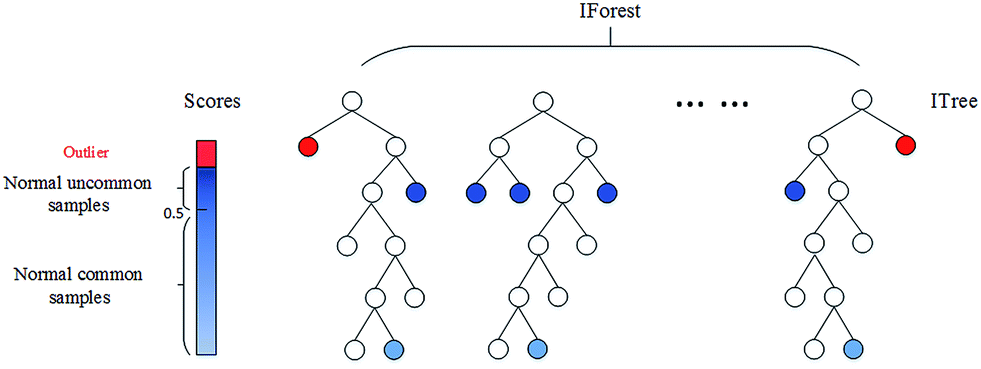

Short Answer
Isolation Forest (iForest) is a machine learning algorithm for anomaly detection. Instances, which have an average shorter path length in the trained isolation forest, are classified as anomalous points.
Long Answer
The isolation Forest algorithm is a very effective and intuitive anomaly detection method, which was first proposed by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in 2008. (F. T. Liu, K. M. Ting, and Z.-H. Zhou. Isolation forest. In Proceedings of the IEEE International Conference on Data Mining, pages 413–422, 2008.)

The philosophy behind iForest is that anomalous data points are few and exotic. That makes them isolated from the normal points.

From a mathematical point of view, recursive partitioning can be represented by a tree structure named Isolation Tree, while the number of partitions required to isolate a point can be interpreted as the length of the path, within the tree, to reach a terminating node starting from the root.


Algorithm
Let \boldsymbol{X} = \{x_1, \ldots, x_n\}X={x 
1
​
 ,…,x 
n
​
 } be a set of dd-dimensional points, and \boldsymbol{X}'X 
′
  is a subsample from \boldsymbol{X}X. An Isolation Tree (iTree) is defined as a data structure with the following properties:

For each node \boldsymbol{T}T in the Tree, \boldsymbol{T}T is either an external-node with no child, or an internal-node with one "test" and exactly two daughter nodes (\boldsymbol{T}_ {l}T 
l
​
  and \boldsymbol{T}_ {r}T 
r
​
 ).
A test at node \boldsymbol{T}T consists of an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p such that the test \boldsymbol{q}<\boldsymbol{p}q<p determines the traversal of a data point to either (\boldsymbol{T}_ {l}T 
l
​
  or \boldsymbol{T}_ {r}T 
r
​
 ).
In order to build an iTree, the algorithm recursively divides \boldsymbol{X}'X 
′
  by randomly selecting an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p, until either

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="PHKTKYAZsXz4FtVvo8lUpMJv3",
    project_name="fraudes-grandes-clientes",
    workspace="napo1998delsur",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/napo1998delsur/fraudes-grandes-clientes/a1638ca0437f4b82b938082a95caec42



In [3]:
Experiment(log_code=True, api_key="PHKTKYAZsXz4FtVvo8lUpMJv3")

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/napo1998delsur/fraudes-grandes-clientes/a1638ca0437f4b82b938082a95caec42
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Not all initial data has been logged for experiment a1638ca0437f4b82b938082a95caec42, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.

In [2]:
class ExNode:
    def __init__(self,size):
        self.size=size
        
class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

In [5]:
clase200=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\clase200.csv')

In [6]:
clase200.head()

,Etiquetas de fila,ene,feb,mar,abr,may,jun,jul,ago,sep,...,feb.1,mar.1,abr.1,may.1,jun.1,jul.1,ago.1,sep.1,oct.1,nov.1
0,200001701,31.0,29.0,31.0,30.0,31.0,31.0,31.0,31.0,31.0,...,31.0,30.0,28.0,31.0,31.0,31.0,31.0,30.0,30.0,31.0
1,200001801,31.9,29.5,31.3,30.9,31.5,31.3,31.6,31.7,31.8,...,31.9,30.0,28.1,31.0,31.1,32.6,31.5,30.4,30.2,31.1
2,200003801,31.2,29.0,31.0,30.6,31.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200005801,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0
4,200005901,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0


In [30]:
datos=clase200.fillna(0)

In [8]:
clase200.columns

Index(['Etiquetas de fila', 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul',
       'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1', 'abr.1',
       'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1'],
      dtype='object')

In [9]:
clase200.shape

(116, 24)

In [10]:
clase200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Etiquetas de fila  116 non-null    int64  
 1   ene                116 non-null    float64
 2   feb                115 non-null    float64
 3   mar                115 non-null    float64
 4   abr                115 non-null    float64
 5   may                115 non-null    float64
 6   jun                114 non-null    float64
 7   jul                113 non-null    float64
 8   ago                113 non-null    float64
 9   sep                113 non-null    float64
 10  oct                113 non-null    float64
 11  nov                113 non-null    float64
 12  dic                113 non-null    float64
 13  ene.1              113 non-null    float64
 14  feb.1              113 non-null    float64
 15  mar.1              113 non-null    float64
 16  abr.1              111 non

array([[<AxesSubplot: title={'center': 'Etiquetas de fila'}>,
        <AxesSubplot: title={'center': 'ene'}>,
        <AxesSubplot: title={'center': 'feb'}>,
        <AxesSubplot: title={'center': 'mar'}>,
        <AxesSubplot: title={'center': 'abr'}>],
       [<AxesSubplot: title={'center': 'may'}>,
        <AxesSubplot: title={'center': 'jun'}>,
        <AxesSubplot: title={'center': 'jul'}>,
        <AxesSubplot: title={'center': 'ago'}>,
        <AxesSubplot: title={'center': 'sep'}>],
       [<AxesSubplot: title={'center': 'oct'}>,
        <AxesSubplot: title={'center': 'nov'}>,
        <AxesSubplot: title={'center': 'dic'}>,
        <AxesSubplot: title={'center': 'ene.1'}>,
        <AxesSubplot: title={'center': 'feb.1'}>],
       [<AxesSubplot: title={'center': 'mar.1'}>,
        <AxesSubplot: title={'center': 'abr.1'}>,
        <AxesSubplot: title={'center': 'may.1'}>,
        <AxesSubplot: title={'center': 'jun.1'}>,
        <AxesSubplot: title={'center': 'jul.1'}>],
       [

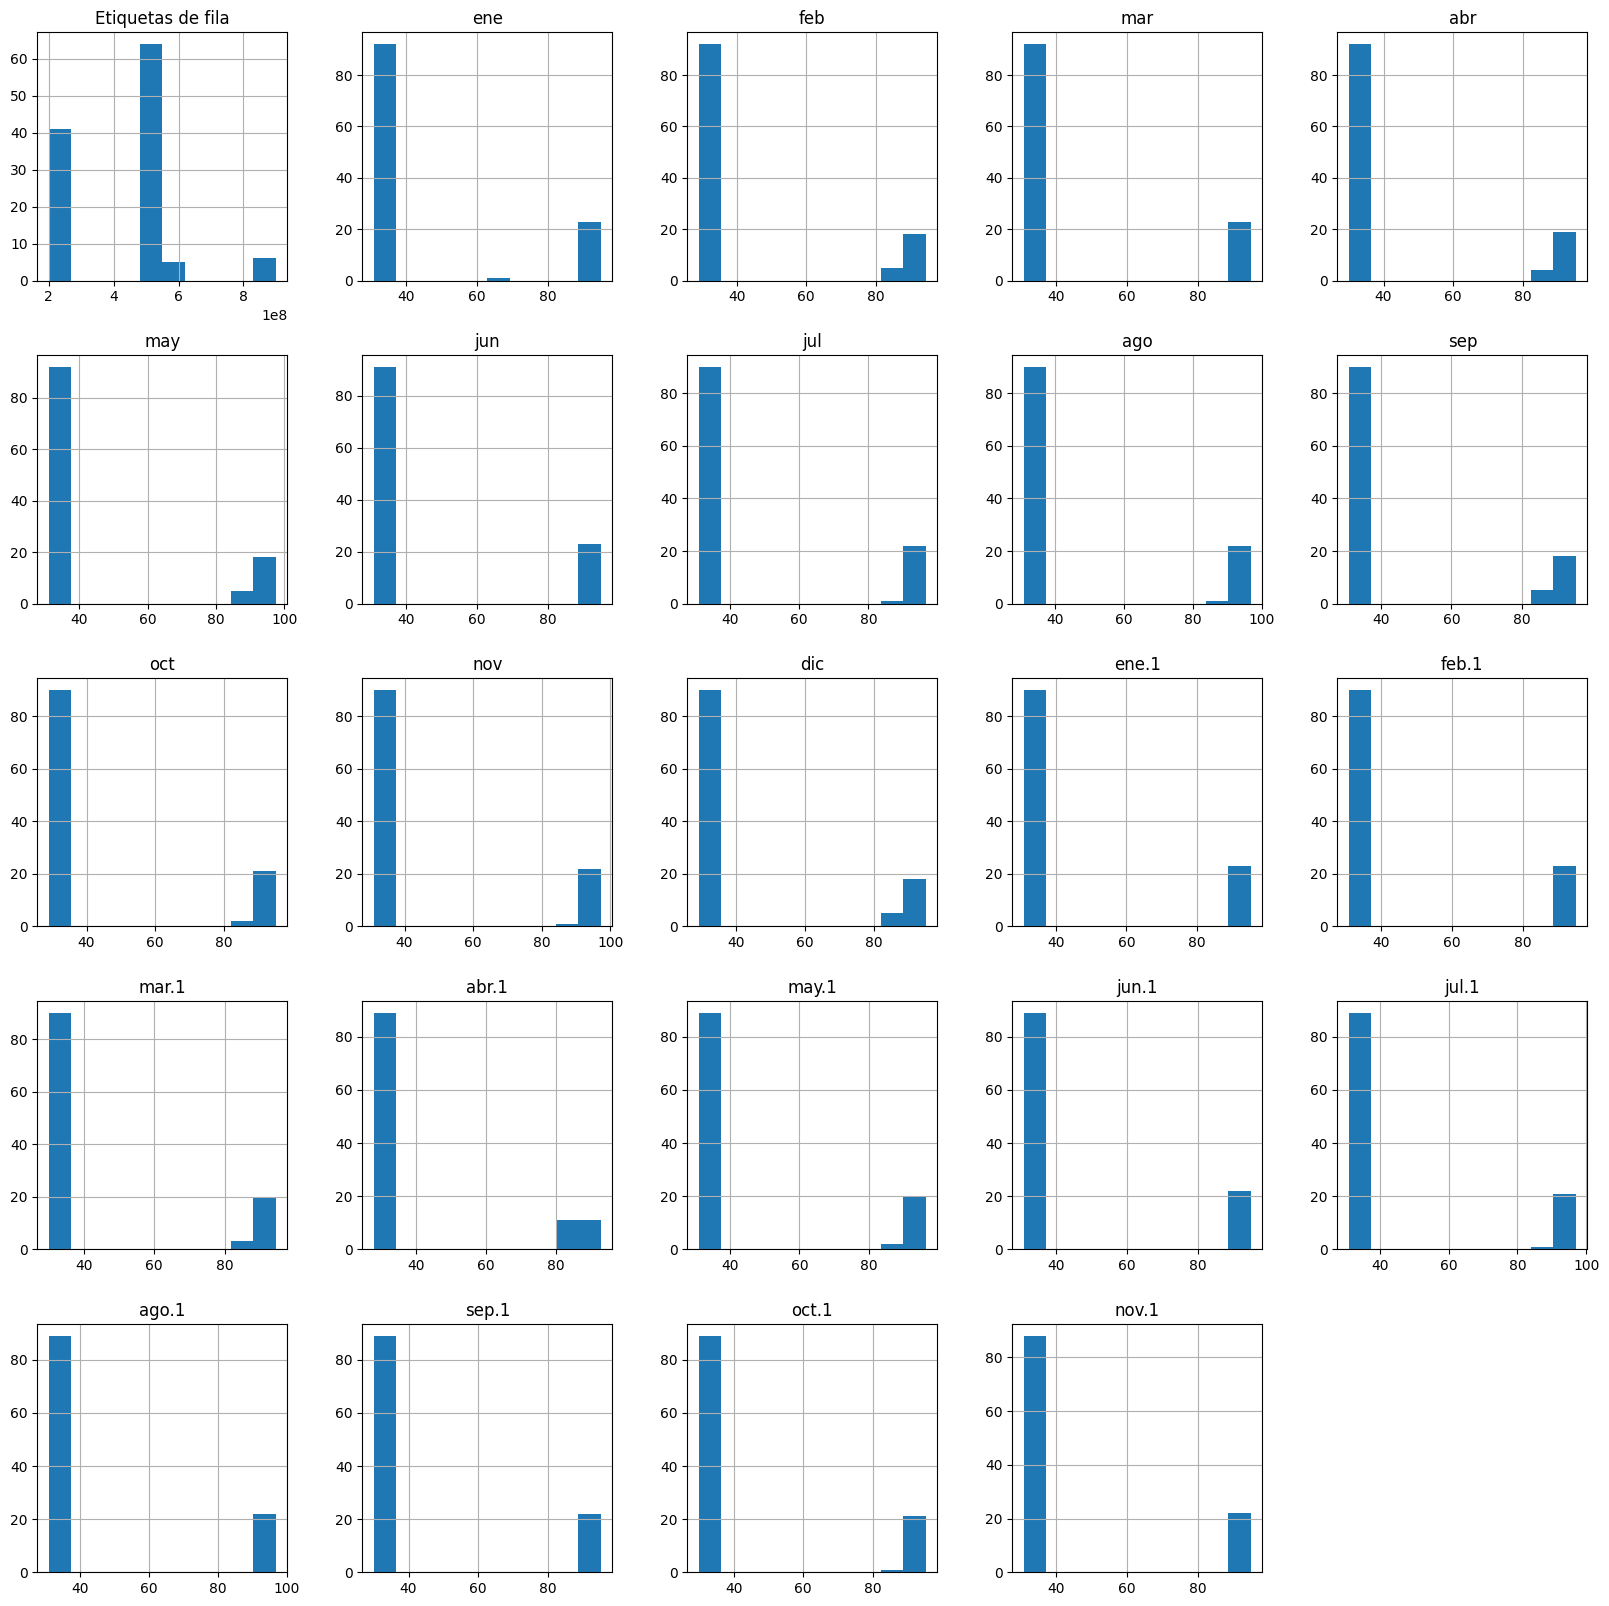

In [11]:
# plot hist

clase200.hist(figsize=(20,20))

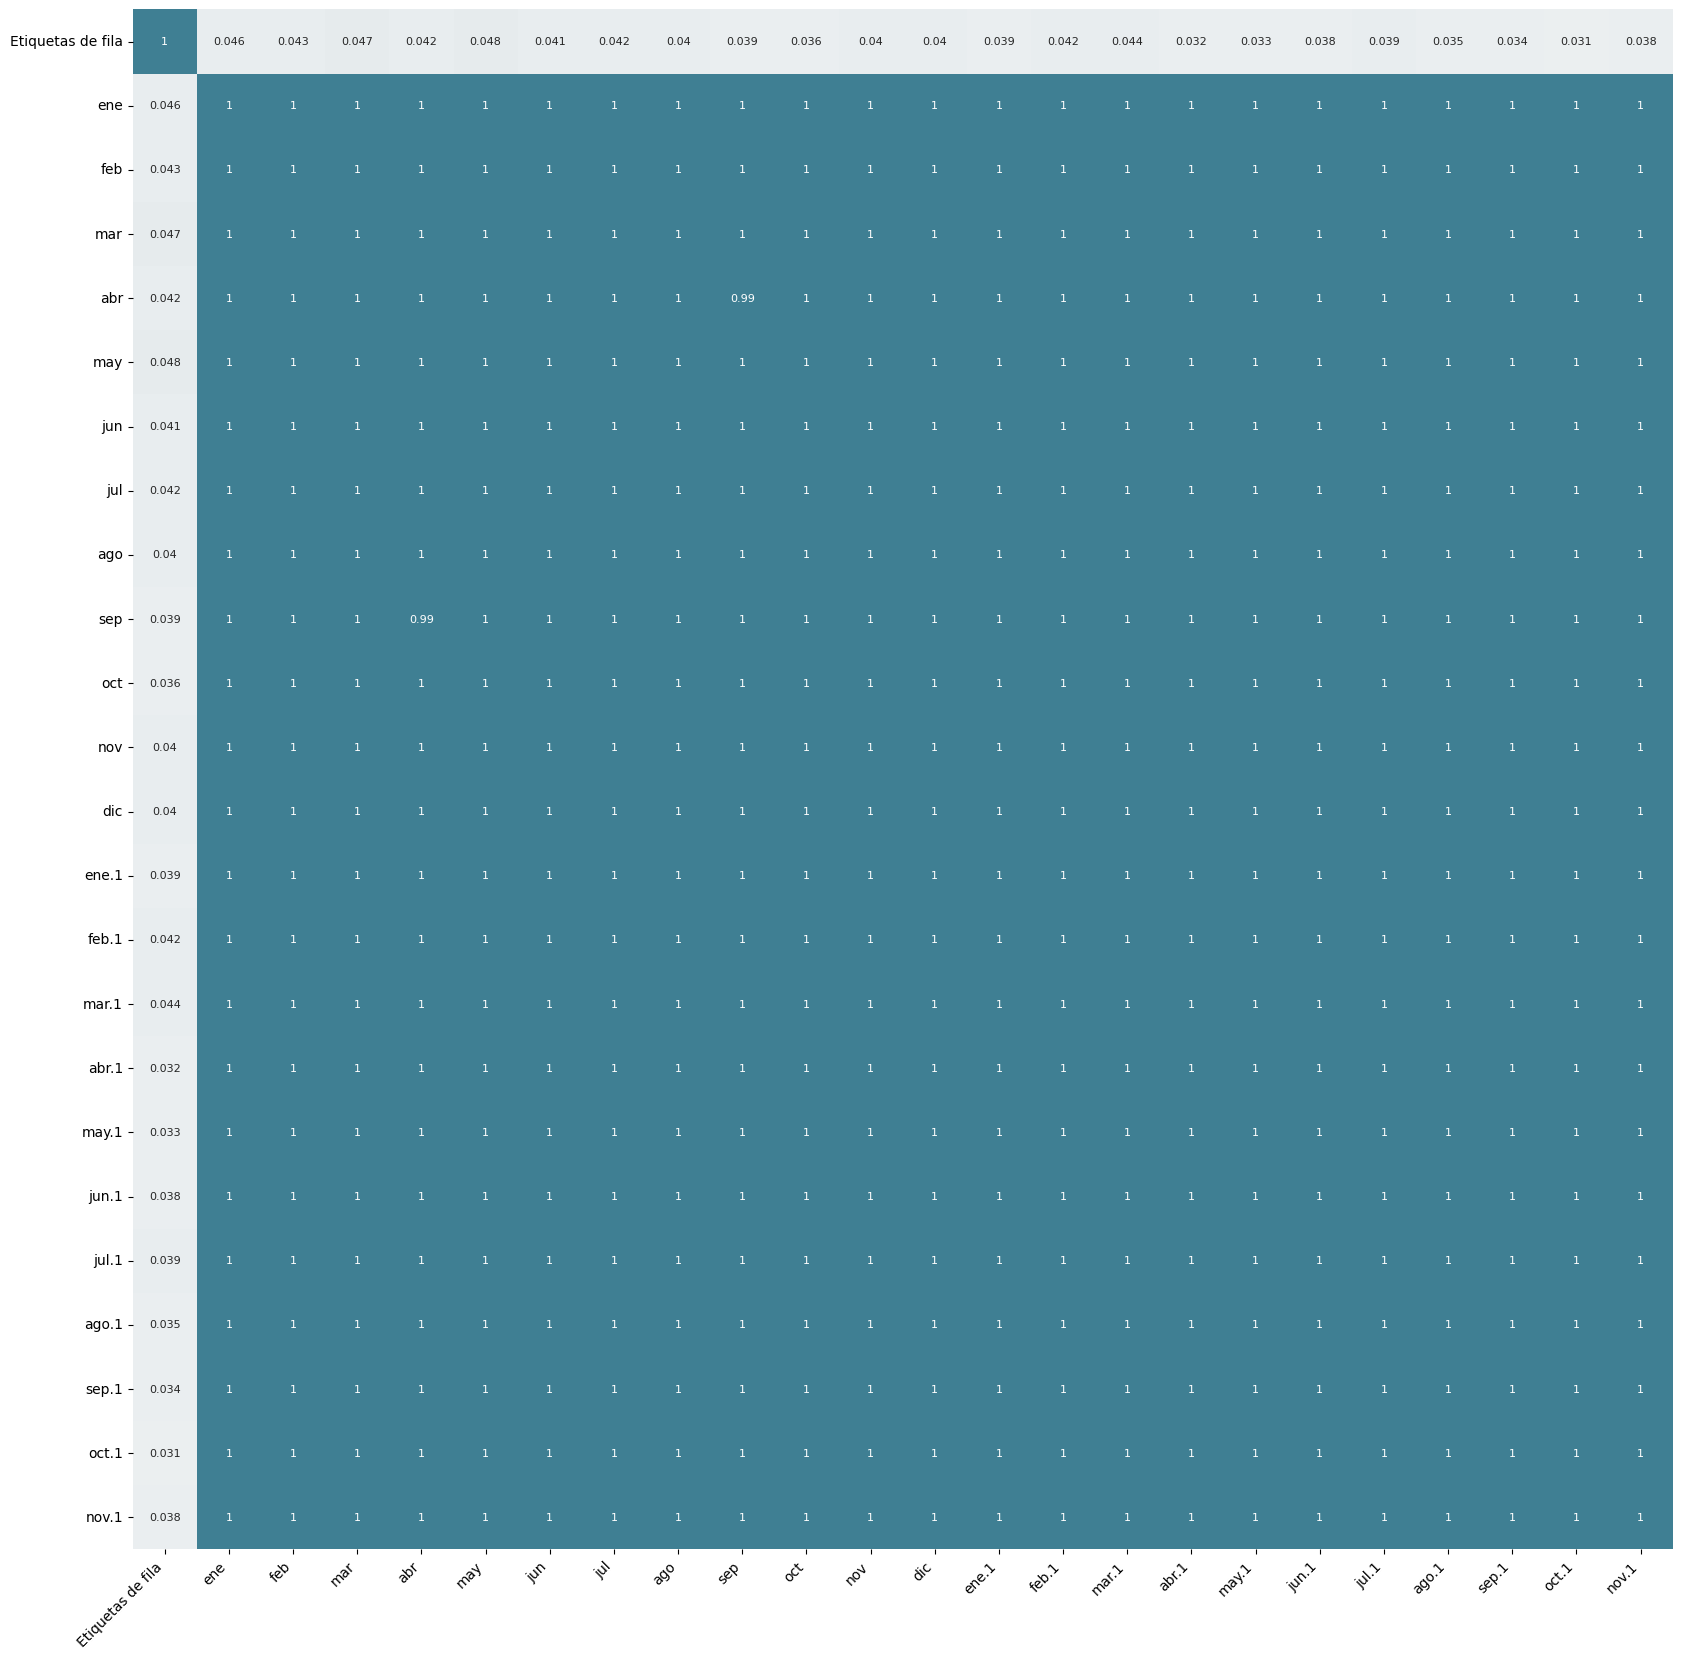

In [12]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =clase200.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [13]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = clase200.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

,variable_1,variable_2,r,abs_r
438,jun.1,jun,0.999828,0.999828
162,jun,jun.1,0.999828,0.999828
335,ene.1,nov.1,0.999815,0.999815
565,nov.1,ene.1,0.999815,0.999815
37,ene,ene.1,0.999814,0.999814
...,...,...,...,...
383,mar.1,nov.1,0.999201,0.999201
428,may.1,ago.1,0.999192,0.999192
497,ago.1,may.1,0.999192,0.999192
483,ago.1,mar,0.999190,0.999190


In [14]:
clase200.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Etiquetas de fila,116.0,4.273406e+08,1.841178e+08,200001701.0,2.110580e+08,503968701.0,5.136351e+08,900275600.0
ene,116.0,4.408276e+01,2.512163e+01,31.0,3.120000e+01,31.5,3.190000e+01,94.9
feb,115.0,4.174696e+01,2.485906e+01,29.0,2.910000e+01,29.5,2.990000e+01,94.5
mar,115.0,4.360000e+01,2.450448e+01,31.0,3.120000e+01,31.6,3.190000e+01,94.9
abr,115.0,4.261652e+01,2.461029e+01,30.0,3.020000e+01,30.5,3.080000e+01,95.3
may,115.0,4.377391e+01,2.498052e+01,31.0,3.110000e+01,31.4,3.190000e+01,97.6
jun,114.0,4.376228e+01,2.475018e+01,31.0,3.112500e+01,31.5,3.190000e+01,94.9
jul,113.0,4.446106e+01,2.495602e+01,31.0,3.170000e+01,32.0,3.270000e+01,96.6
ago,113.0,4.423982e+01,2.561964e+01,31.0,3.100000e+01,31.5,3.190000e+01,96.8
sep,113.0,4.378319e+01,2.467297e+01,31.0,3.120000e+01,31.6,3.190000e+01,95.2


In [15]:

import plotly.express as px


In [16]:
clase200.isnull().sum()

Etiquetas de fila    0
ene                  0
feb                  1
mar                  1
abr                  1
may                  1
jun                  2
jul                  3
ago                  3
sep                  3
oct                  3
nov                  3
dic                  3
ene.1                3
feb.1                3
mar.1                3
abr.1                5
may.1                5
jun.1                5
jul.1                5
ago.1                5
sep.1                5
oct.1                5
nov.1                6
dtype: int64

In [31]:
clase200.columns

Index(['Etiquetas de fila', 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul',
       'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1', 'abr.1',
       'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1'],
      dtype='object')

In [32]:
clase200.isnull().sum()

Etiquetas de fila    0
ene                  0
feb                  1
mar                  1
abr                  1
may                  1
jun                  2
jul                  3
ago                  3
sep                  3
oct                  3
nov                  3
dic                  3
ene.1                3
feb.1                3
mar.1                3
abr.1                5
may.1                5
jun.1                5
jul.1                5
ago.1                5
sep.1                5
oct.1                5
nov.1                6
dtype: int64

In [33]:
clase200.columns

Index(['Etiquetas de fila', 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul',
       'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1', 'abr.1',
       'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1'],
      dtype='object')

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
X=datos[[ 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul',
       'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1', 'abr.1',
       'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1']]

In [40]:

X_train, X_test =\
       train_test_split(X, 
                        test_size=0.2, 
                        random_state=1,
                        )

In [41]:
clf = IsolationForest(random_state=0).fit(X_train)

In [42]:
test=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\clase200.csv')

In [43]:
test.isnull().sum()

Etiquetas de fila    0
ene                  0
feb                  1
mar                  1
abr                  1
may                  1
jun                  2
jul                  3
ago                  3
sep                  3
oct                  3
nov                  3
dic                  3
ene.1                3
feb.1                3
mar.1                3
abr.1                5
may.1                5
jun.1                5
jul.1                5
ago.1                5
sep.1                5
oct.1                5
nov.1                6
dtype: int64

In [44]:
y=clf.predict(test)

C:\Users\nperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Etiquetas de fila

  warnings.warn(message, FutureWarning)


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
X_train.head()

,01/01/2019,02/01/2019,03/01/2019,04/01/2019,05/01/2019,06/01/2019,07/01/2019,08/01/2019,09/01/2019,10/01/2019,...,02/01/2022,03/01/2022,04/01/2022,05/01/2022,06/01/2022,07/01/2022,08/01/2022,09/01/2022,10/01/2022,11/01/2022
724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,18840.0,21024.0,21696.0,20232.0,19776.0,21816.0,22320.0,21504.0,22800.0,21408.0,...,18024.0,17832.0,16368.0,17496.0,16296.0,17592.0,17472.0,16200.0,15048.0,15048.0
681,3384.0,3480.0,3360.0,3384.0,3936.0,4224.0,4224.0,3912.0,3768.0,4728.0,...,6408.0,6576.0,6552.0,6936.0,6024.0,4440.0,8472.0,5880.0,5664.0,5664.0
593,6756.0,9756.0,10092.0,10596.0,8172.0,5172.0,5508.0,4908.0,5484.0,5148.0,...,9228.0,10848.0,11796.0,9912.0,11196.0,10200.0,8796.0,10608.0,10680.0,10680.0
690,6042.0,6570.0,7254.0,7014.0,6576.0,6852.0,7632.0,7170.0,7284.0,6678.0,...,6798.0,7350.0,6876.0,6756.0,6618.0,7434.0,7896.0,7038.0,7224.0,7224.0


In [27]:
Y_pred=clf.predict(X_test)

In [28]:
Y_pred2=clf.predict(X_train)

In [54]:
pred_df = pd.DataFrame(y,columns=["Prediccion"])
pred_df.to_csv('outputsgrandesclientes.csv', header=True, index_label='Id')

In [68]:
pred_df.head()

,Prediccion
0,1
1,1
2,1
3,1
4,1


In [31]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [55]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [69]:
print(pred_df['Prediccion'].unique())

[ 1 -1]


In [70]:
prediccion={
    1:'Sin Anomalia',
    -1:'Anomalia'
}
pred_df['Prediccion_map']=pred_df['Prediccion'].map(prediccion)

In [87]:
pred_df.head()

,Prediccion,Prediccion_map
0,1,Sin Anomalia
1,1,Sin Anomalia
2,1,Sin Anomalia
3,1,Sin Anomalia
4,1,Sin Anomalia


In [71]:
print(pred_df['Prediccion_map'].unique())

['Sin Anomalia' 'Anomalia']


In [73]:
salida=pred_df.to_csv('salida.csv')

In [81]:
pred_df.head()

,Prediccion,Prediccion_map
0,1,Sin Anomalia
1,1,Sin Anomalia
2,1,Sin Anomalia
3,1,Sin Anomalia
4,1,Sin Anomalia


In [96]:
datos=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\suministrosindustriales.csv')

In [97]:
datos.head()

,N°,Zona,Un.lect.,Contrato,Tp.tarifa,Instalacion,Fact.cálculo,Equipo,Número de serie,Fabricante,...,11/01/2022,Prioridad,Promedio,% Variacion,Tendencia,Grafico,Ordenes,Observacion,Prediccion,Prediccion_map
0,1131,ST,ST_78_03,504832401.0,G_GMH,30323809.0,160.0,1.000000e+11,115316.0,SIEMENS,...,21680.0,Media,"16,481",101.38%,-,NaN,NaN,NaN,1.0,Sin Anomalia
1,947,ST,ST_78_14,207043801.0,G_GMH,30104871.0,60.0,1.000000e+11,202.0,SCHLUMBERGER,...,0.0,Baja,"5,245",199.64%,-,NaN,NaN,NaN,1.0,Sin Anomalia
2,1167,ST,ST_78_13,515750101.0,G_GMH,30369130.0,160.0,1.000000e+11,182971.0,LANDIS + GYR,...,336.0,Media,"20,403",82.15%,-,NaN,NaN,NaN,1.0,Sin Anomalia
3,602,SS,SS_07_06,101263601.0,G_GMH,30035303.0,120.0,1.000000e+11,479287.0,SIEMENS,...,5904.0,Baja,"4,346",42.12%,-,NaN,NaN,NaN,1.0,Sin Anomalia
4,484,SS,SS_78_11,502594901.0,G_GMH,30206065.0,120.0,1.000000e+11,106418.0,SIEMENS,...,44280.0,Alta,"51,534",13.82%,-,NaN,NaN,NaN,1.0,Sin Anomalia


In [98]:
datos.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [100]:
px.scatter(datos,x='N°',y='Prediccion',color='Prediccion_map')